# 2019 Bay Wheels (Ex FordBike) Ride Data Exploration and Visual Explanation
### by Hassan Ayman

## Introduction

[Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels) (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. The dataset used for this project include the [monthly individual trip data](https://www.lyft.com/bikes/bay-wheels/system-data) from January 2019 to December 2019 in CSV format covering the greater San Francisco Bay area having separate file for every month, also available [here](https://s3.amazonaws.com/baywheels-data/index.html)

I have chosen to work on 2019 more recent complete annual data.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

In [15]:
#as data is devided into monthly folders, let's merge them into one dataframe
frames = [pd.read_csv(f) for f in glob.glob(os.path.join('data','*.csv'))]
df = pd.concat(frames, ignore_index=True)
print(df.shape)
df.head()

(1863721, 14)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [3]:
#let's save the resutled dataframe for purposes of reusage
df.to_csv('ford_bike_2019.csv',index=False)



In [6]:
#let's get pverview of our dataset
print(df.info(null_counts = True))
print(df.describe())

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2506983 non-null  int64  
 1   start_time               2506983 non-null  object 
 2   end_time                 2506983 non-null  object 
 3   start_station_id         2426249 non-null  float64
 4   start_station_name       2426850 non-null  object 
 5   start_station_latitude   2506983 non-null  float64
 6   start_station_longitude  2506983 non-null  float64
 7   end_station_id           2424081 non-null  float64
 8   end_station_name         2424633 non-null  object 
 9   end_station_latitude     2506983 non-null  float64
 10  end_station_longitude    2506983 non-null  float64
 11  bike_id                  2506983 non-null  int64  
 12  user_type                2506983 non-null  object 
 13  bike_share_for_all_trip  226

In [4]:
#let's check the number of nulls and duplications 

print('number of null values:\n',df.isnull().sum())
print('\n number of duplications in rows:\n',df.duplicated().sum())

number of null values:
 duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

 number of duplications in rows:
 0


### Cleaning stage ###
- Let's start defining the existing issues/improvments in the dataset , to move on cleaning:
1. 5 of 14 features have null values (neglecting the last features of 'rental_access_method ' )
2. start time & end time are not in the right timestamp format
3. ids columns need to be in object format while they are in float form<br/>
(start_station_id,end_station_id,bike_id)
4. columsn of ( User_type, gender, and bike_share_for_all) should be in category format instead of object



In [86]:
#I will handle missing values after cleaning to decide what features to remove their nulls
#let's copy the current df and remove the last neglected column to clean it
df_cln = df.drop(columns=['rental_access_method']).copy()

#let's tranform ids columns into the right form (str)
df_cln['start_station_id'] = df_cln['start_station_id'].astype('str')
df_cln['end_station_id'] = df_cln['end_station_id'].astype('str')
df_cln['bike_id'] = df_cln['bike_id'].astype('str')

#let's transofrm categorical columns from object to catgeroy type
df_cln['user_type'] = df_cln['user_type'].astype('category')
df_cln['bike_share_for_all_trip']= df_cln['bike_share_for_all_trip'].astype('category')

#let's modify the start/end time columns to be in timestamp format
df_cln['start_time'] = pd.to_datetime(df_cln['start_time'])
df_cln['end_time'] = pd.to_datetime(df_cln['end_time'])

#let's check how does the datset looks like now
df_cln.info(null_counts=True)


&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2506983 non-null  int64         
 1   start_time               2506983 non-null  datetime64[ns]
 2   end_time                 2506983 non-null  datetime64[ns]
 3   start_station_id         2506983 non-null  object        
 4   start_station_name       2426850 non-null  object        
 5   start_station_latitude   2506983 non-null  float64       
 6   start_station_longitude  2506983 non-null  float64       
 7   end_station_id           2506983 non-null  object        
 8   end_station_name         2424633 non-null  object        
 9   end_station_latitude     2506983 non-null  float64       
 10  end_station_longitude    2506983 non-null  float64       
 11  bike_id                  2506983 non-null  object

In [87]:
#let's add some time-related columns for time aggregations and groupings
import datetime as dt
#getting month
df_cln['start_month'] = df_cln.start_time.dt.strftime('%B')
#getting week day
df_cln['start_dayofweek'] = df_cln.start_time.dt.strftime('%A')
#getting sart hour (0:23)
df_cln['start_hourofday'] = df_cln.start_time.dt.strftime('%H')
#Lastly, let's make the duration in minutes 
df_cln['duration_minute'] = df_cln['duration_sec']/60

#let's have a look at sample rows now
df_cln.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_month,start_dayofweek,start_hourofday,duration_minute
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,January,Thursday,17,1347.083333
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,January,Thursday,20,1098.333333
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,January,Thursday,18,1043.883333
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,January,Thursday,19,744.666667
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,January,Thursday,14,1011.816667


In [95]:
df_cln.dropna(inplace=True)
df_cln.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 2262979 entries, 0 to 2355470
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  start_month              object        
 15  start_dayofweek          object        
 16  start_hourofday          object        
 17  duration_minu

In [96]:
#let's have a summary of our numrical fresh feature now
df_cln.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,duration_minute
count,2.262979e+06,2.262979e+06,2.262979e+06,2.262979e+06,2.262979e+06,2.262979e+06
mean,8.069304e+02,3.776979e+01,-1.223549e+02,3.776918e+01,-1.223516e+02,1.344884e+01
std,1.922206e+03,1.030237e-01,1.626585e-01,2.005436e-01,5.807114e-01,3.203676e+01
min,6.100000e+01,0.000000e+00,-1.224952e+02,0.000000e+00,-1.224952e+02,1.016667e+00
25%,3.580000e+02,3.777008e+01,-1.224130e+02,3.777041e+01,-1.224117e+02,5.966667e+00
50%,5.690000e+02,3.778053e+01,-1.223984e+02,3.778079e+01,-1.223981e+02,9.483333e+00
75%,8.840000e+02,3.779539e+01,-1.222948e+02,3.779639e+01,-1.222948e+02,1.473333e+01
max,8.621700e+04,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00,1.436950e+03


In [97]:
#let's check the types of users
df_cln.user_type.value_counts()

Subscriber    1860795
Customer       402184
Name: user_type, dtype: int64

### What is the structure of your dataset?

After combining all months files of 2019 ,removing nulls,removing the neglected feature, adding required columns , the resulted dataset contains 2,506,983 trips with 18 feature columns. no duplications found

I have moved on with remvoing nulls although it eleminated December records totally , as when i left it, it affected danalysis badly 

As I have mentioend , the dataset focusing on 2019 trips in bay arena , SanFrancisco,US.

we can categorize the 18 features columns as below : 

- Trip Duration (seconds)
    - Start Time and Date
    - End Time and Date
- Start Station ID
    - Start Station Name
    - Start Station Latitude
    - Start Station Longitude
- End Station ID
    - End Station Name
    - End Station Latitude
    - End Station Longitude
- Bike ID
- User Type (Subscriber--> Member or Customer--> On demand)

    
> Below are added columns for more aggregations and multicariate options:	
- Start Time Month	
- Start Time Day of the Week	
- Start Time Hour
- Duration (minutes)


### What is/are the main feature(s) of interest in your dataset?

Of course tha main features of interest is the duration , how it's ditributed and what affects it. I have chosen duration because it's the feature that directly affects price, which would be the main interest for any bussines 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that day,hour and month would have the most impact on duration , as weekends and specific seasons of the year would impact greatly on biking generally, also user type would have a sound impact but as much as day and month

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: duration , plus features that could affect it (hour,day,month) individually

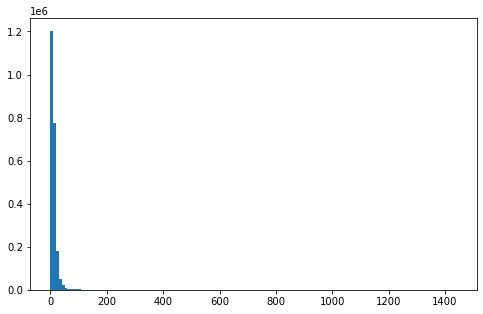

In [100]:
#let's check the duration(minutes) ditribution in the dataset

bins = np.arange(0, df_cln['duration_minute'].max()+10, 10)

plt.figure(figsize=[8, 5])

plt.hist(data = df_cln, x = 'duration_minute', bins=bins);

it's so claer that ~99% of trips have a duration less than 150 minutes which complies with the statistical summary (75% of trips lies below 16 minutes duration).

suprisingly- but not imppossible- there are rare trips duration lasts for ~24 hours , which has appeared in the descriptove stats summary also when checking the max value for duration

In [34]:
#so, let's focus on the 99% where most of data lies 
df_cln.duration_minute.describe(percentiles=[.99])

count    2.262979e+06
mean     1.344884e+01
std      3.203676e+01
min      1.016667e+00
50%      9.483333e+00
99%      6.883333e+01
max      1.436950e+03
Name: duration_minute, dtype: float64

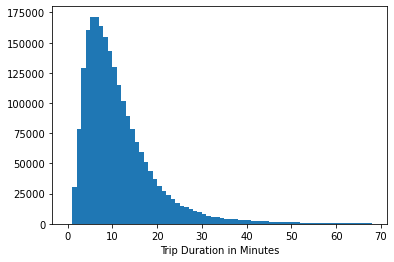

In [46]:
#then , let's plot the ditribution for the 99% of data 
bins = np.arange(0, 69, 1)
plt.hist(data=df_cln, x='duration_minute', bins=bins);
plt.xlabel('Trip Duration in Minutes');


it's clear that about 90% of trips are less than 30 minutes , top count of trips are around 10 minutes 

I see that it owuld be more reliable for filter our dataset for durations only less than 69 minutes , to focus on the portion of interest only and eleminated any protential outliers 

In [104]:
df_cln = df_cln[df_cln['duration_minute']< 69]
df_cln.info(null_counts=True)

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 2240401 entries, 6 to 2355470
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2240401 non-null  int64         
 1   start_time               2240401 non-null  datetime64[ns]
 2   end_time                 2240401 non-null  datetime64[ns]
 3   start_station_id         2240401 non-null  object        
 4   start_station_name       2240401 non-null  object        
 5   start_station_latitude   2240401 non-null  float64       
 6   start_station_longitude  2240401 non-null  float64       
 7   end_station_id           2240401 non-null  object        
 8   end_station_name         2240401 non-null  object        
 9   end_station_latitude     2240401 non-null  float64       
 10  end_station_longitude    2240401 non-null  float64       
 11  bike_id                  2240401 non-null  object

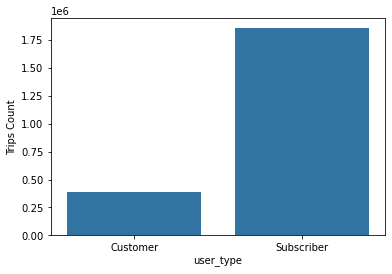

In [107]:
#let's check distributions of features other than duration
def_color = sb.color_palette()[0]
sb.countplot(data=df_cln, x='user_type',color=def_color);
plt.xlabel('user_type');
plt.ylabel('Trips Count');

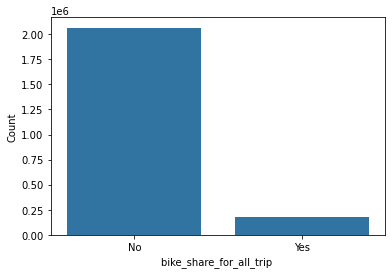

In [108]:
sb.countplot(data=df_cln, x='bike_share_for_all_trip', color=def_color);
plt.xlabel('bike_share_for_all_trip ');
plt.ylabel('Count');

As shown in the couple charts above , the majority of users are subscribers who are not using sharing for all trip

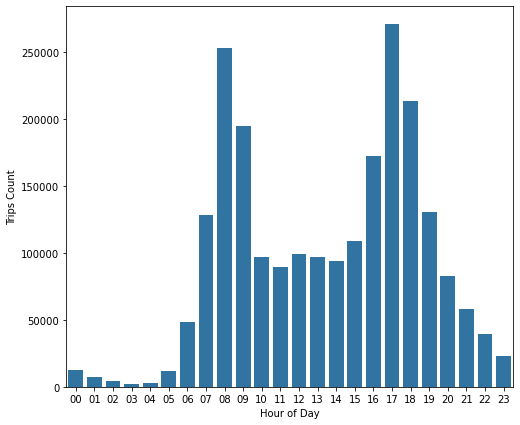

In [109]:
#let's plot day hour / trip distribution
plt.figure(figsize=[8, 7])
sb.countplot(data=df_cln, x='start_hourofday', color=def_color);
plt.xlabel('Hour of Day');
plt.ylabel('Trips Count');

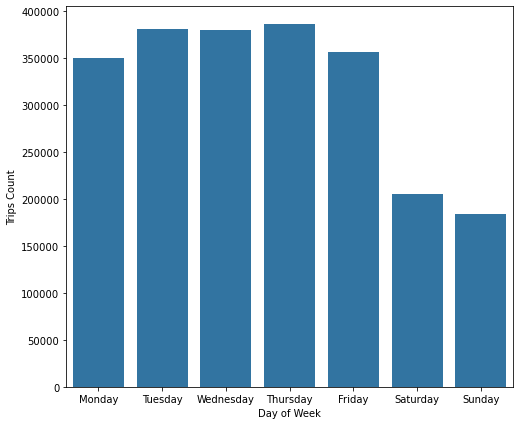

In [110]:
#let's plot week day / trip distribution\
plt.figure(figsize=[8, 7])
#let's do this step to arrange the week days in plot from start to end 
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdayord = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_cln['start_dayofweek'] = df_cln['start_dayofweek'].astype(weekdayord)

#let's plot
sb.countplot(data=df_cln, x='start_dayofweek', color=def_color);
plt.xlabel('Day of Week');
plt.ylabel('Trips Count');

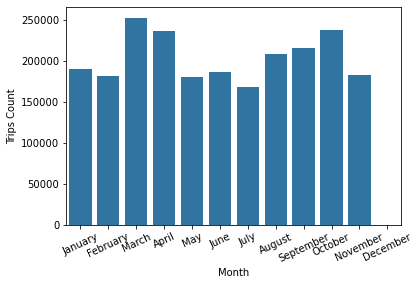

In [111]:

#let's plot month / trip distribution\

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthord = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df_cln['start_month'] = df_cln['start_month'].astype(monthord)

sb.countplot(data=df_cln, x='start_month', color=def_color);
plt.xticks(rotation=25);
plt.xlabel('Month');
plt.ylabel('Trips Count');

As shown in the 3 charts above :

1. Hourly , Trips are focused from 8 am to 5 pm (work hours), highest hours with trips are the boundaries (8 am & 5 pm) , it sounds logic as 8 am preople are going to work , 5 pm people are returing homes.
2. Weekly basis , Trips are going down significantly at saturdays and sundays , which is reasonable to have lower number of trips at weekends
3. Monthly ,  Trips are focused at spring and autumun , mainly top 3 months : March,April, September . Not a surprise to have most trips at best weather seasons ! (P.S : December was removed totally while removing nulls , couldn't leave it as it cause misleading resutls as mentioned before)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The duration(transformed to minutes for more ease of analysis and compactness) variable took on a large range of values, with a right skewed normal distribution ,having a durations up to 24 hours was surprising , these outliers were removed  while trimming data out of focus (removing 1% of outliers) 

- Most trips were found to be from 8am to 9am & from 5pm to 6pm (going to and returning form work hours) with majority durtion within 5 to 15 mins. Trips went down in weekends and went up in March,April and September (Spring and autmun have a wondeful weather for biking !)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- When investigating features , it was remarkanle that majority (+80%) of users are sucbscribers who are not using sharing
Also it was abnormal to find trips with durations reaching 24 hours.
- not changing form of data, only exxtracting feature columns for hour,week day and month from date , to be able to aggregate data more conveniently 

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

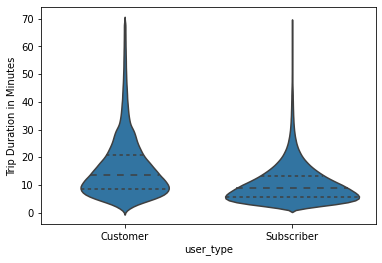

In [106]:
#let's check the relation between both types od users and duration
sb.violinplot(data=df_cln, x='user_type', y='duration_minute', color=def_color, inner='quartile');
plt.xlabel('user_type');
plt.ylabel('Trip Duration in Minutes');

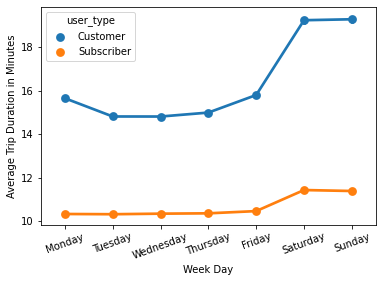

In [114]:
#let's check the the duration for every uset type per weekday 
sb.pointplot(data=df_cln, x='start_dayofweek', y='duration_minute', hue='user_type');
plt.xlabel('Week Day');
plt.ylabel('Average Trip Duration in Minutes');
plt.xticks(rotation=20);

- At the violin plot , We can notice that cuetomer graph ia narrower and more expanded than subscriber's one, This means that customer's durations are more deiverse and have wider tange than subscriber's durations , also indicates that subscribers have a basic routine they follow daily

- The second plot cofirms our findings in the violin plots , customers have higher avrege durations , specially at weekends , This may indicates that most of customers are tourists who are biking for fun

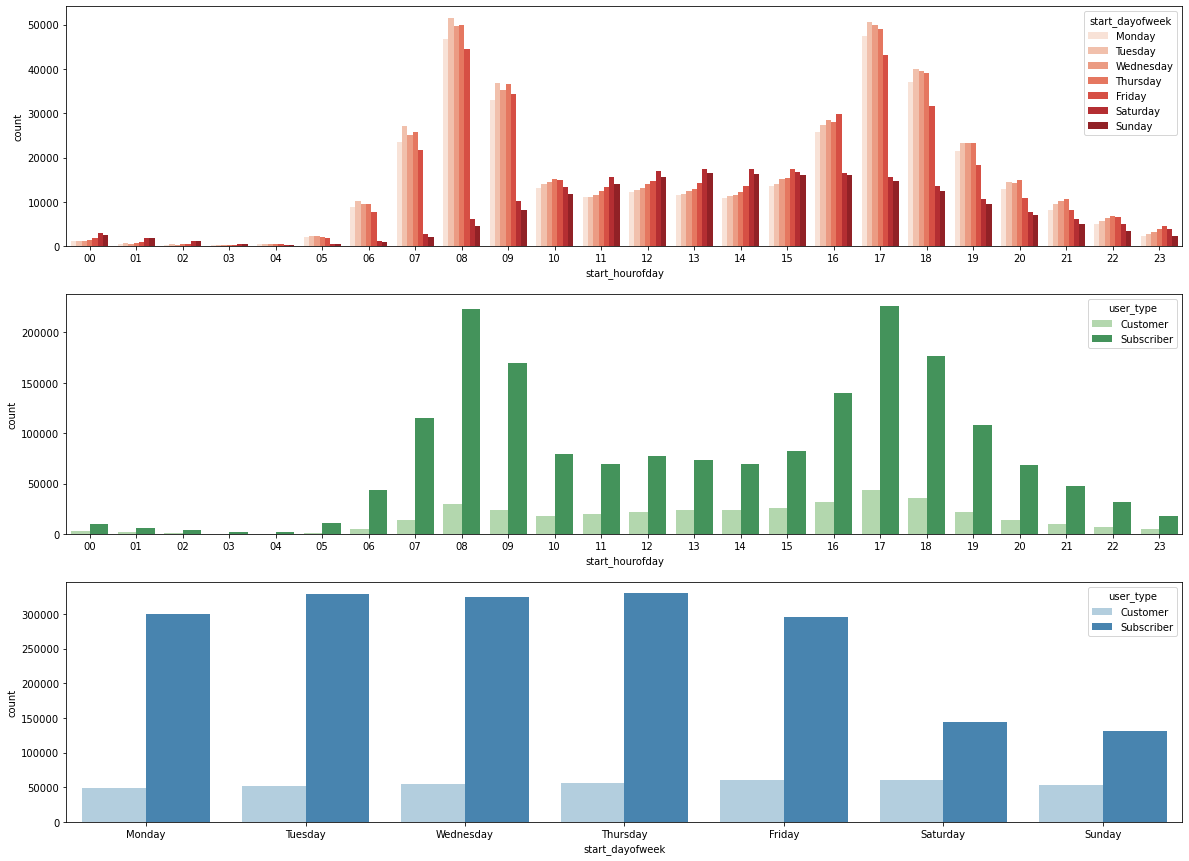

In [126]:
plt.figure(figsize = [20, 15]);


plt.subplot(3, 1, 1);
sb.countplot(data = df_cln, x = 'start_hourofday', hue = 'start_dayofweek', palette = 'Reds');

ax = plt.subplot(3, 1, 2);
sb.countplot(data = df_cln, x = 'start_hourofday', hue = 'user_type', palette = 'Greens');


ax = plt.subplot(3, 1, 3);
sb.countplot(data = df_cln, x = 'start_dayofweek', hue = 'user_type', palette= 'Blues');

**From the above chart we could find that:**

1. Most number of trips is found to be on Tuesday, specificaly at 8 am.

2. Most number of trips for both subscribers and customers are at 5 pm.

3. Most number of trips for subscribers are on Tuesday , while cusctomers hit the top on Friday (which asserts our guess that customers are mostly non local tourists who rea biking for fun)

&lt;Figure size 432x288 with 0 Axes&gt;

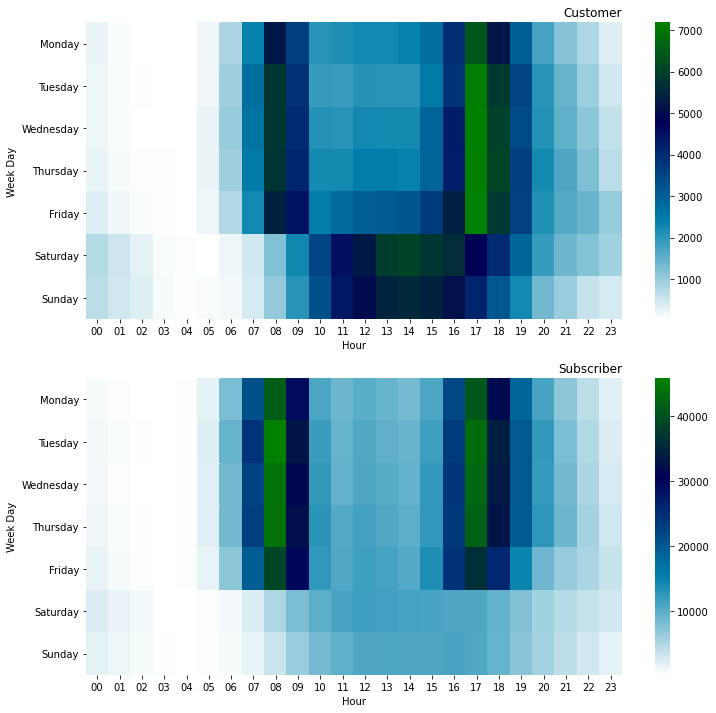

In [135]:

#let's a plot a heatmap indicating how trips is ditriubuted across hours for every user type
plt.suptitle('Hourly Trips per Weekdays for user types')

plt.figure(figsize = [12, 12]);
plt.subplot(2, 1, 1)
customers = df_cln[df_cln['user_type']=='Customer']
cust_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
cust_counts = cust_counts.reset_index(name='count')
cust_counts = cust_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(cust_counts, cmap='ocean_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour');
plt.ylabel('Week Day');

plt.subplot(2, 1, 2)
subscribers = df_cln[df_cln['user_type']=='Subscriber']
sub_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
sub_counts = sub_counts.reset_index(name='count')
sub_counts = sub_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(sub_counts, cmap='ocean_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour');
plt.ylabel('Week Day');

- The above heatmap shows a significant differnce between customers and subscribers usage
- For subscribers , we can see heavy usage focused on working hours, more precisely morning hours of going to work(7am:9am), and evening hours of returning home(4pm:6pm)
- While for customers, heavier usage starts at the evening (4pm:8pm), also usage is more diverse across the day unlike subscribers whose usage focused on specific hours
- For weekends , it's so clear that customer have much higher activity along the whole day (10am:6pm) than subscribers 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of 'duration in minuets' in this section by looking at the impact of the four additional features(user_type,hour of day , week day, month). The multivariate exploration here showed that there indeed are completely different usage pattern for every user_type, which also highly affected by week day and hour of day.

The higher activtiy of subscriber is totally related to working days and rush hours going to and leaving from work, while higher activity of customers are mainly at the evening and for weekends they have higher activity almost all day , which may indicate they are biking for having a tour at the city , or generally for entertainment

### Were there any interesting or surprising interactions between features?

No big surprises in the data , they are harmonized and integrated in systematic way. Although i found it's interesting that our data analysis is just confirming the lifestyle of people , both residents and tourists and could be noticed easily from usage patterns, it's the beauty of data anaytics when it asserts our assumpsions and also help us to  learn more about poeple's life   

In [137]:
#saving the cleaned file to use in slide deck
df_cln.to_csv(r'fordbike_2019_clean.csv',index=False)

In [1]:
#getting notebook as html
from subprocess import call
call(['python', '-m', 'nbconvert', 'fordbike_explore.ipynb'])

0